#**Netflix Original Films & IMDB Scores - EDA**


This dataset consists of all Netflix original films released as of June 1st, 2021. Additionally, it also includes all Netflix documentaries and specials. The data was webscraped off of this Wikipedia page, which was then integrated with a dataset consisting of all of their corresponding IMDB scores. IMDB scores are voted on by community members, and the majority of the films have 1,000+ reviews.

You dataset available on [Kaggle.](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores)

Dataset consist of:


*   Title
*   Genre
*   Premiere date
*   Runtime 
*   IMDB scores
*   Languages



## This colab notebooks cover this guestion:

1.   [In which language were the long-running films created according to the dataset? Make a visualization.](#Question1)
2.   [Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.](#Question2)
3.   [Which genre has the highest IMDB rating among movies shot in English?](#Question3)
4.   [What is the average 'runtime' of movies shot in 'Hindi'?](#Question4)
5.   [How many categories does the Genre Column have and what are they? Visualize it.](#Question5)
6.   [Find the 3 most used languages in the movies in the data set.](#Question6)
7.   [Top 10 Movies With IMDB Ratings](#Question7)
8.   [What is the correlation between IMDB score and 'Runtime'? Examine and visualize.](#Question8)
9.   [Top 10 Genre by IMDB Score](#Question9)
10.  [What are the top 10 movies with the highest 'runtime'? Visualize it.](#Question10)
11.  [In which year was the most movies released? Visualize it.](#Question11)
12.  [Which language movies have the lowest average IMDB rating? Visualize it.](#Question12)
13.  [Which year has the greatest total runtime?](#Question13)
14.  [What is the "Genre" where each language is used the most?](#Question14)
15.  [Is there any outlier data in the data set? Please explain.](#Question15)



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GLOBAL - Bootcamp/NetflixOriginals.csv",encoding = "ISO-8859-1")
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [ ]:
df.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [ ]:
df['Premiere'] = pd.to_datetime(df['Premiere'])

# columns year, month and weekday
df['year']    = df['Premiere'].dt.year
df['month']   = df['Premiere'].dt.month_name()
df['weekday'] = df['Premiere'].dt.day_name()


df.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,August,Friday
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,December,Thursday
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,January,Friday
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,October,Friday


<a name="Question1"></a>
###**1-In which language were the long-running films created according to the dataset? Make a visualization.**

In [ ]:
df_temp=df.groupby(['Runtime','Title','Language']).mean().sort_values(by='Runtime', ascending=False).reset_index().iloc[:,:3]
df_temp

,Runtime,Title,Language
0,209,The Irishman,English
1,155,Da 5 Bloods,English
2,153,Springsteen on Broadway,English
3,151,The Forest of Love,Japanese
4,151,Citation,English
...,...,...,...
579,11,Zion,English
580,10,American Factory: A Conversation with the Obamas,English
581,9,Canvas,English
582,7,Cops and Robbers,English


In [ ]:
fig = px.box(df, x= 'Runtime', hover_data = df[['Title','Language']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

<a name="Question2"></a>
### **2-Find and visualize the IMDB values of the movies shot in the 'Documentary' genre between January 2019 and June 2020.**

In [ ]:
df_doc = df[ ((df["year"]== 2019) |
              ((df["year"]== 2020) & ((df["month"] ==("January"))| (df["month"] ==("February"))| (df["month"] ==("March"))| (df["month"] ==("April")) | (df["month"] ==("May")) | (df["month"] ==("June")))) ) 
              & (df["Genre"]== "Documentary")  ]
df_doc

,Title,Genre,Premiere,Runtime,IMDB Score,Language,year,month,weekday
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,August,Monday
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish,2019,December,Thursday
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English,2019,September,Friday
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish,2019,May,Friday
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English,2019,October,Wednesday
151,One Take,Documentary,2020-06-18,85,5.7,Thai,2020,June,Thursday
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish,2019,May,Wednesday
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English,2019,March,Friday
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English,2019,August,Wednesday
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish,2019,September,Wednesday


In [ ]:
fig = px.scatter(df_doc, x='year', y='IMDB Score',color="month")
fig.update_traces(marker_size=10)
fig.show()

<a name="Question3"></a>
### **3-Which genre has the highest IMDB rating among movies shot in English?**

In [ ]:
top_imdb_english = df[df['Language'] == "English"]
top_imdb_english = top_imdb_english.groupby(['Language','Genre','Title']).mean().sort_values(by=["IMDB Score"],ascending=False)[:10]
top_imdb_english

Runtime  \
Language Genre                                Title                                                 
English  Documentary                          David Attenborough: A Life on Our Planet       83.0   
         One-man show                         Springsteen on Broadway                       153.0   
         Concert Film                         Ben Platt: Live from Radio City Music Hall     85.0   
                                              Taylor Swift: Reputation Stadium Tour         125.0   
         Documentary                          Cuba and the Cameraman                        114.0   
                                              Dancing with the Birds                         51.0   
                                              Seaspiracy                                     89.0   
         Animation/Christmas/Comedy/Adventure Klaus                                          97.0   
         Documentary                          Disclosure: Trans Lives on Screen             107.0   
                                              13th                                          100.0   

                                                                                          IMDB Score  \
Language Genre                                Title                                                    
English  Documentary                          David Attenborough: A Life on Our Planet           9.0   
         One-man show                         Springsteen on Broadway                            8.5   
         Concert Film                         Ben Platt: Live from Radio City Music Hall         8.4   
                                              Taylor Swift: Reputation Stadium Tour              8.4   
         Documentary                          Cuba and the Cameraman                             8.3   
                                              Dancing with the Birds                             8.3   
                                              Seaspiracy                                         8.2   
         Animation/Christmas/Comedy/Adventure Klaus                                              8.2   
         Documentary                          Disclosure: Trans Lives on Screen                  8.2   
                                              13th                                               8.2   

                                                                                            year  
Language Genre                                Title                                               
English  Documentary                          David Attenborough: A Life on Our Planet    2020.0  
         One-man show                         Springsteen on Broadway                     2018.0  
         Concert Film                         Ben Platt: Live from Radio City Music Hall  2020.0  
                                              Taylor Swift: Reputation Stadium Tour       2018.0  
         Documentary                          Cuba and the Cameraman                      2017.0  
                                              Dancing with the Birds                      2019.0  
                                              Seaspiracy                                  2021.0  
         Animation/Christmas/Comedy/Adventure Klaus                                       2019.0  
         Documentary                          Disclosure: Trans Lives on Screen           2020.0  
                                              13th                                        2016.0

<a name="Question4"></a>
### **4-What is the average 'runtime' of movies shot in 'Hindi'?**

In [ ]:
df_hindi = df[df["Language"] == "Hindi"]
df_hindi.Runtime.value_counts()

120    3
114    3
149    2
106    2
112    2
98     2
90     1
101    1
97     1
133    1
108    1
105    1
142    1
94     1
100    1
118    1
95     1
111    1
147    1
125    1
104    1
119    1
144    1
139    1
117    1
Name: Runtime, dtype: int64

In [ ]:
df_hindi.Runtime.mean()

115.78787878787878

<a name="Question5"></a>
### **5-How many categories does the Genre Column have and what are they? Visualize it.**

In [ ]:
df['Genre'].value_counts()

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64

In [ ]:
df['Genre'].value_counts().sum()

584

In [ ]:
genre =df['Genre'].value_counts()

In [ ]:
fig = px.bar(genre, x= genre.index, y=genre.values, labels={'y':'Number of Movies from the Genre', 'index':'Genres'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

<a name="Question6"></a>
### **6-Find the 3 most used languages in the movies in the data set.**

In [ ]:
# printing unique values of Language
df.Language.unique()

array(['English/Japanese', 'Spanish', 'Italian', 'English', 'Hindi',
       'Turkish', 'Korean', 'Indonesian', 'Malay', 'Dutch', 'French',
       'English/Spanish', 'Portuguese', 'Filipino', 'German', 'Polish',
       'Norwegian', 'Marathi', 'Thai', 'Swedish', 'Japanese',
       'Spanish/Basque', 'Spanish/Catalan', 'English/Swedish',
       'English/Taiwanese/Mandarin', 'Thia/English', 'English/Mandarin',
       'Georgian', 'Bengali', 'Khmer/English/French', 'English/Hindi',
       'Tamil', 'Spanish/English', 'English/Korean', 'English/Arabic',
       'English/Russian', 'English/Akan', 'English/Ukranian/Russian'],
      dtype=object)

In [ ]:
df.Language.value_counts()

English                       401
Hindi                          33
Spanish                        31
French                         20
Italian                        14
Portuguese                     12
Indonesian                      9
Japanese                        6
Korean                          6
German                          5
Turkish                         5
English/Spanish                 5
Polish                          3
Dutch                           3
Marathi                         3
English/Hindi                   2
Thai                            2
English/Mandarin                2
English/Japanese                2
Filipino                        2
English/Russian                 1
Bengali                         1
English/Arabic                  1
English/Korean                  1
Spanish/English                 1
Tamil                           1
English/Akan                    1
Khmer/English/French            1
Swedish                         1
Georgian      

In [ ]:
df_top_lang = df.Language.value_counts().nlargest(3)

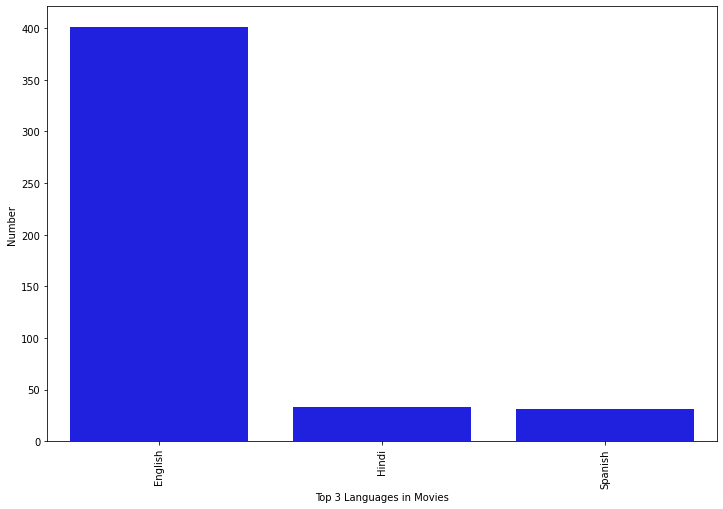

In [ ]:
# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_top_lang.index,y=df_top_lang.values,data=df,color='blue')
plt.xlabel('Top 3 Languages in Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

<a name="Question7"></a>
### **7- Top 10 Movies With IMDB Ratings**

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

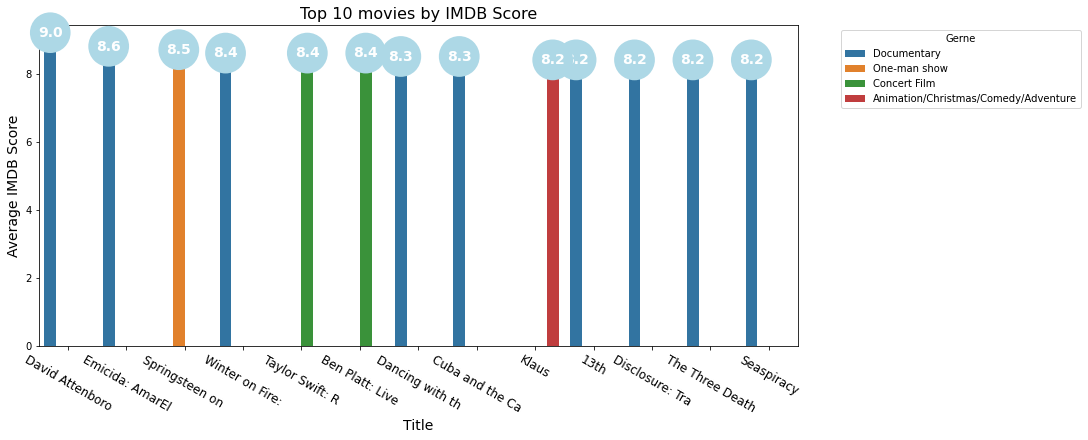

In [ ]:
df_temp=df.sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:13,:]

fig, ax = plt.subplots(1,1, figsize = (15, 6), constrained_layout = True)
ax = sns.barplot(x = 'Title', y = 'IMDB Score', data = df_temp, hue = 'Genre')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()+0.1,
            s = f"{i.get_height()}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="circle,pad=0.5", fc='lightblue', ec="lightblue", lw=2))


ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Title'].unique()], fontsize=12, rotation = -30)
plt.title('Top 10 movies by IMDB Score', fontsize=16)
plt.legend(title='Gerne', bbox_to_anchor=(1.05, 1), loc='upper left');

<a name="Question8"></a>
### **8-What is the correlation between IMDB score and 'Runtime'? Examine and visualize.**

In [ ]:
df[['IMDB Score','Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [ ]:
fig = px.scatter(df, x='IMDB Score', y='Runtime')
fig.show()

<a name="Question9"></a>
### **9-Top 10 Genre by IMDB Score**

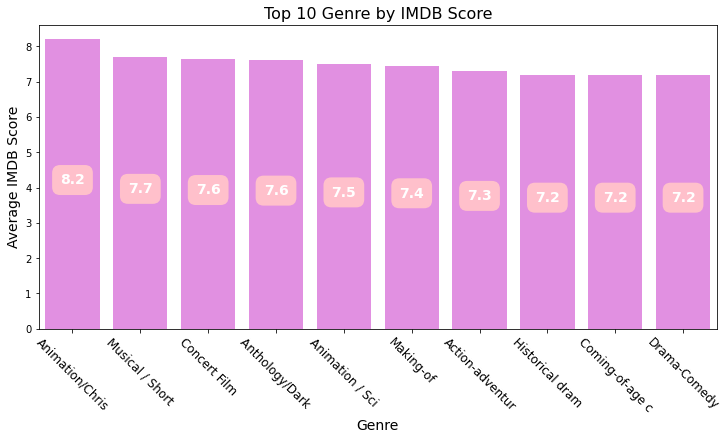

In [ ]:
df_temp=df.groupby(['Genre']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = sns.barplot(x = 'Genre', y = 'IMDB Score', data = df_temp, color = 'violet')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))


ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Genre'].unique()], fontsize=12, rotation = -45 )
plt.title('Top 10 Genre by IMDB Score', fontsize=16);

<a name="Question10"></a>
### **10-What are the top 10 movies with the highest 'runtime'? Visualize it.**

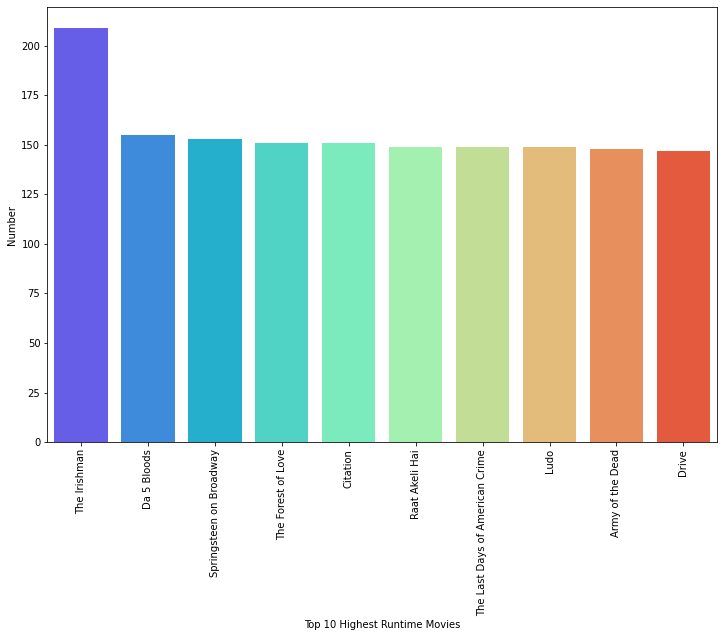

In [ ]:
df_temp=df.groupby(['Title']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_temp["Title"],y=df_temp["Runtime"],data=df,palette='rainbow')
plt.xlabel('Top 10 Highest Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Number')
plt.show()

<a name="Question11"></a>
### **11-In which year was the most movies released? Visualize it.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



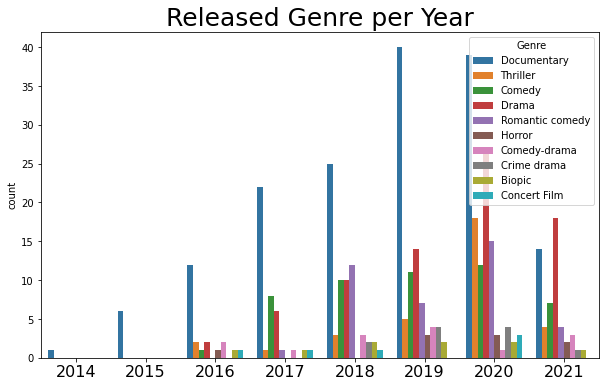

In [ ]:
top_genres = df.loc[df['Genre'].isin(df.groupby('Genre').sum().sort_values(by='IMDB Score', ascending=False).reset_index()['Genre'][:10])].groupby('Genre').mean().sort_values(by='IMDB Score', ascending=False).reset_index()['Genre']
plt.figure(figsize= (10, 6))

sns.countplot(df.loc[df['Genre'].isin(top_genres)]['year'], 
              hue= df.loc[df['Genre'].isin(top_genres)]['Genre'])

plt.title('Released Genre per Year', size= 25)
plt.xlabel(None)
plt.xticks(size= 16)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



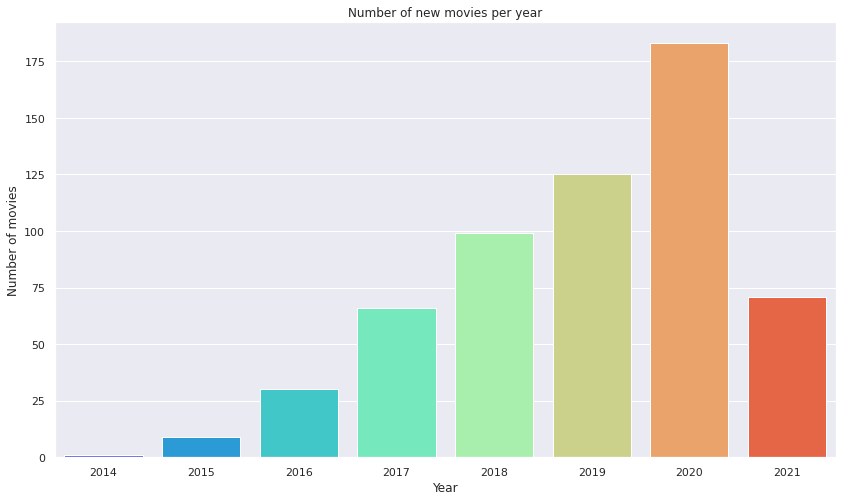

In [ ]:
sns.set(rc={'figure.figsize':(14, 8)})

ax = sns.countplot(df['year'], palette='rainbow')
ax.set_title('Number of new movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

<a name="Question12"></a>
### **12-Which language movies have the lowest average IMDB rating? Visualize it.**

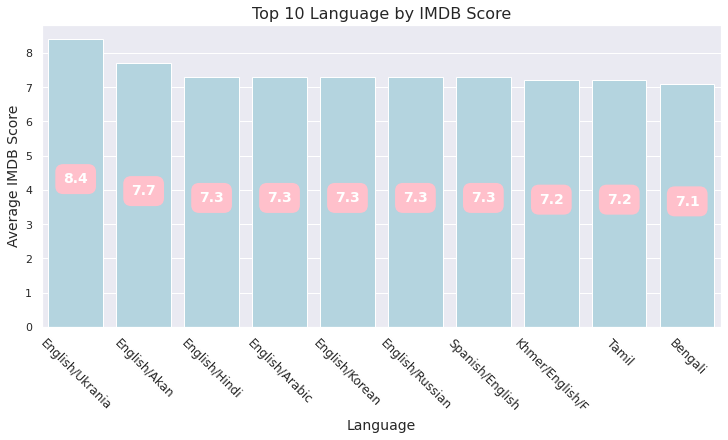

In [ ]:
df_temp=df.groupby(['Language']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = sns.barplot(x = 'Language', y = 'IMDB Score', data = df_temp, color = 'lightblue')

for i in ax.patches:    
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}", 
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))


ax.set_xlabel('Language', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Language'].unique()], fontsize=12, rotation = -45 )
plt.title('Top 10 Language by IMDB Score', fontsize=16);

<a name="Question13"></a>
### **13-Which year has the greatest total runtime?**

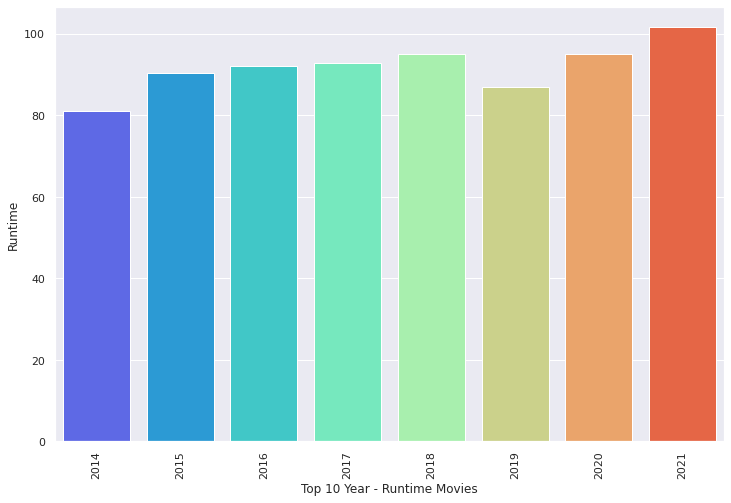

In [ ]:
df_temp=df.groupby(['year']).mean(['Runtime rating']).sort_values(by='Runtime', ascending=False).reset_index().iloc[:10,:2]

# plotting a bar graph for better visualisation
plt.figure(figsize=(12,8))
sns.barplot(x=df_temp["year"],y=df_temp["Runtime"],data=df,palette='rainbow')
plt.xlabel('Top 10 Year - Runtime Movies')
plt.xticks(rotation=90)
plt.ylabel('Runtime')
plt.show()

In [ ]:
df_run= df[df["year"] ==2021]
df_run.Runtime.mean()

101.6056338028169

<a name="Question14"></a>
### **14-What is the "Genre" where each language is used the most?**

In [ ]:
genre_lang =[]
for i in df.Language.unique():
    df_lang =df[df["Language"]==i]
    df_lang_genre =df_lang.Genre.value_counts().nlargest(1)
    #print(f'*************************************************')
    #print(f'Language: {i}\n', df_lang_genre)
    genre_lang.append((i,df_lang_genre))

In [ ]:
df_lang = pd.DataFrame(genre_lang, columns = ['Language', 'Genre'])
df_lang.sort_values(by=['Language'],ignore_index=True)

,Language,Genre
0,Bengali,"Documentary 1 Name: Genre, dtype: int64"
1,Dutch,"Romantic comedy 1 Name: Genre, dtype: int64"
2,English,"Documentary 120 Name: Genre, dtype: int64"
3,English/Akan,"War drama 1 Name: Genre, dtype: int64"
4,English/Arabic,"Documentary 1 Name: Genre, dtype: int64"
5,English/Hindi,"Documentary 2 Name: Genre, dtype: int64"
6,English/Japanese,"Documentary 1 Name: Genre, dtype: int64"
7,English/Korean,"Action-adventure 1 Name: Genre, dtype: int64"
8,English/Mandarin,"Documentary 2 Name: Genre, dtype: int64"
9,English/Russian,"Documentary 1 Name: Genre, dtype: int64"


<a name="Question15"></a>
### **15-Is there any outlier data in the data set? Please explain.**

Let's look the Runtime for detecting outlier. We can easily see one outlier with no doubt. The outlier of Runtime column' is "The Irishman"

In [ ]:
fig = px.scatter(x=df['Runtime'], y=df['Title'])
fig.show()